# Titanic Dataset

[Recommended kernel on kaggle](https://www.kaggle.com/code/gunesevitan/titanic-advanced-feature-engineering-tutorial)

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Data Structure

In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Missing Values

Check how many missing values exist in each column:

In [5]:
# Count missing values
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Just want to see example data with null

In [6]:
titanic[titanic['age'].isnull()].head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
17,1,2,male,NaN,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True
19,1,3,female,NaN,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True
26,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
28,1,3,female,NaN,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True


`deck` column has so many missing values; common approaches: drop it

In [7]:
titanic.drop(columns=['deck'], inplace=True)

Fill missing age values with median

In [8]:
print(titanic['age'].median())
print(titanic['age'].mean())

28.0
29.69911764705882


In [9]:
# titanic['age'].fillna(titanic['age'].median(), inplace=True) # this gives FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
titanic['age'] = titanic['age'].fillna(titanic['age'].median())

Fill missing embark_town with mode (most frequent value)

In [10]:
# titanic['embark_town'].fillna(titanic['embark_town'].mode()[0], inplace=True) # this gives FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
titanic['embark_town'] = titanic['embark_town'].fillna(titanic['embark_town'].mode()[0])

**extension**

The `inplace` parameter in Pandas determines whether a method modifies the DataFrame directly or returns a new one.

- `inplace=True` → Changes the original DataFrame without returning a new one.
- `inplace=False` (default) → Returns a new modified DataFrame, leaving the original unchanged.

The `mode()` method finds the most frequently occurring value(s) in a column.
- Returns the most common value(s) as a Pandas Series.
- If there's a tie (multiple values occur most frequently), `mode()` returns all of them.
- `.mode()[0]` selects the first mode in case there are multiple.

FutureWarning: Chained Assignment with inplace=True
- A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
- In Pandas 3.0+, using `inplace=True` on a column selected with `df[col]` will no longer work because it operates on a temporary copy, not the original DataFrame.

## Exploratory Data Analysis (EDA)

### How many people survived?

In [13]:
# count survivors (1 = survived, 0 not survived)
titanic['survived'].value_counts()

survived
0    549
1    342
Name: count, dtype: int64

### Survival Rate by Gender

In [19]:
titanic.groupby('sex')['survived'].mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

Observation: if survival rate is higher for females, it aligns with the "women and children first" policy.

**extension**

In [27]:
titanic.groupby('sex') # still abstract, nothing can be seen

In [40]:
titanic_grouped = titanic.groupby('sex')  # creates the GroupBy object
female = titanic_grouped.get_group('female')  # gets only female passengers
female

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,1,2,female,25.0,0,1,26.0000,S,Second,woman,False,Southampton,yes,False
882,0,3,female,22.0,0,0,10.5167,S,Third,woman,False,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,Queenstown,no,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True


You can loop through the groups to see them:

In [30]:
for name, group in titanic.groupby('sex'):
    print(f"Group: {name}")
    print(group.head()) # Show the first few rows in each group
    print('---')

Group: female
   survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
1         1       1  female  38.0      1      0  71.2833        C   First   
2         1       3  female  26.0      0      0   7.9250        S   Third   
3         1       1  female  35.0      1      0  53.1000        S   First   
8         1       3  female  27.0      0      2  11.1333        S   Third   
9         1       2  female  14.0      1      0  30.0708        C  Second   

     who  adult_male  embark_town alive  alone  
1  woman       False    Cherbourg   yes  False  
2  woman       False  Southampton   yes   True  
3  woman       False  Southampton   yes  False  
8  woman       False  Southampton   yes  False  
9  child       False    Cherbourg   yes  False  
---
Group: male
   survived  pclass   sex   age  sibsp  parch     fare embarked  class    who  \
0         0       3  male  22.0      1      0   7.2500        S  Third    man   
4         0       3  male  35.0      0      0   8.0

You can also turn them into a dictionary:

In [47]:
grouped_dict = dict(list(titanic.groupby('sex')))
grouped_dict['female'].head()  # View female passengers

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,Cherbourg,yes,False


### Survival Rate by Passenger Class

In [43]:
titanic.groupby('class')['survived'].mean()

C:\Users\uthop\AppData\Local\Temp\ipykernel_21692\1139153534.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic.groupby('class')['survived'].mean()


class
First     0.629630
Second    0.472826
Third     0.242363
Name: survived, dtype: float64

Observation: higher-class passengers (1st class) might have better survival rates.

### Visualizing Survival Rates

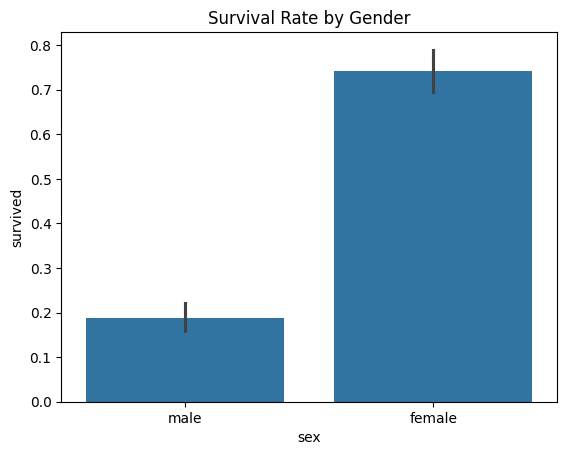

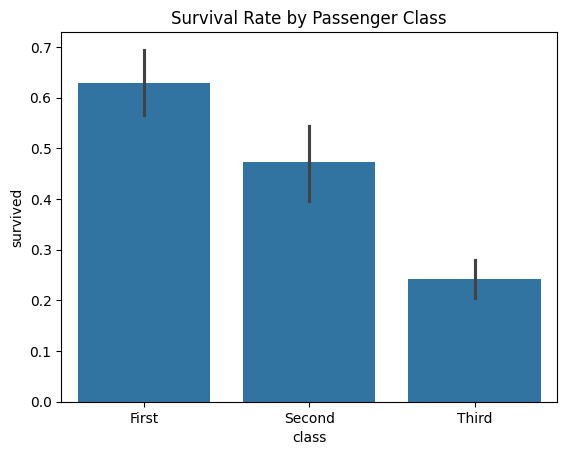

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot for survival by gender
sns.barplot(x='sex', y='survived', data=titanic)
plt.title('Survival Rate by Gender')
plt.show()

# Bar plot for survival by class
sns.barplot(x='class', y='survived', data=titanic)
plt.title('Survival Rate by Passenger Class')
plt.show()

## Next Steps
Now that you've explored the dataset, you can try:
- Correlation analysis: Find relationships between features.
- Feature engineering: Create new features (e.g., family size from sibsp and parch).
- Build a predictive model: Train a classification model (e.g., logistic regression, decision trees).

### Feature engineering: Create new features: `family_size`

In [53]:
# create a new feature: family_size
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1 # to include the passenger themselves

# display the first few rows
titanic[['sibsp', 'parch', 'family_size']].head()

,sibsp,parch,family_size
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1


This feature tells us how many family members a passenger had on board.

Why is this useful?
- Large families might have had trouble escaping together.
- Solo travelers might have struggled to survive without help.

### Analyze Survival Based on Family Size

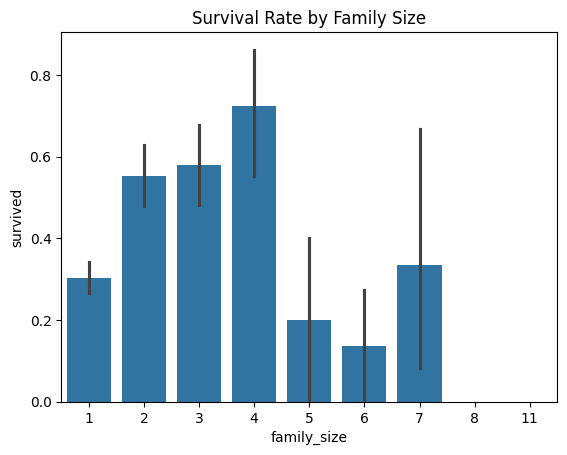

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Survival rate by family size
sns.barplot(x='family_size', y='survived', data=titanic)
plt.title("Survival Rate by Family Size")
plt.show()

- Alone (Family Size = 1) → ~30% survival rate → Traveling alone might have been a disadvantage. Maybe they lacked support?
- Small Families (2-4 members) → Higher survival rates (~60-80%) → This suggests having a few family members helped survival—maybe they assisted each other during evacuation.
- Large Families (5+ members) → Survival rate drops (~20-40%) → It’s likely that large families struggled to escape together.

Possible Explanations

Women & Children First Policy
- Small families (e.g., mother + child) may have been prioritized for lifeboats.
- Large families may have faced difficulty sticking together.

Crowded vs. Privileged Groups
- Large families may have been lower-class passengers with fewer resources.
- 1st class families (typically smaller) may have had better survival chances.

Physical Limitations
- Large groups may have taken longer to navigate chaos, reducing their survival chances.

### Survival Rate by Family Size & Class
- If large families survived more in 1st class, then wealth/status influenced survival.
- If survival was low for large 3rd-class families, it suggests poorer families had fewer resources.

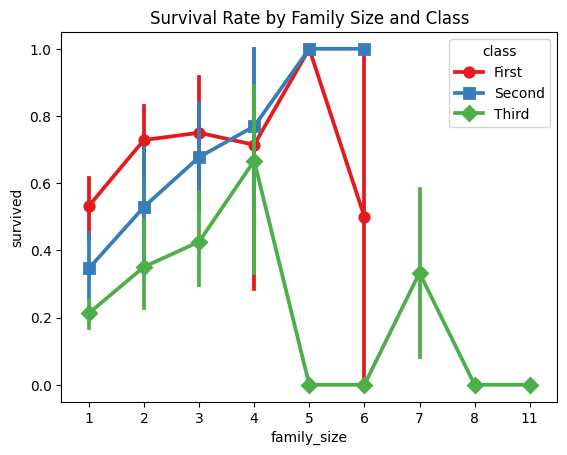

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group survival by class and family size
sns.pointplot(x='family_size', y='survived', hue='class', data=titanic, palette='Set1', markers=["o", "s", "D"])
plt.title("Survival Rate by Family Size and Class")
plt.show()

### Survival Rate by Family Size & Gender
- If small families (2-4) had high female survival rates, it supports the "women and children first" policy.
- If large families had low male survival rates, men may have sacrificed themselves for their families.

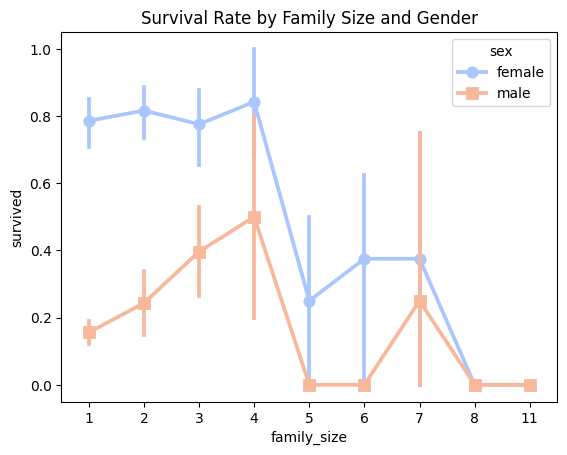

In [60]:
sns.pointplot(x='family_size', y='survived', hue='sex', data=titanic, palette='coolwarm', markers=["o", "s"])
plt.title("Survival Rate by Family Size and Gender")
plt.show()

### Line Plot of Family Size vs. Survival Rate
A simple line plot to visualize survival trends clearly:

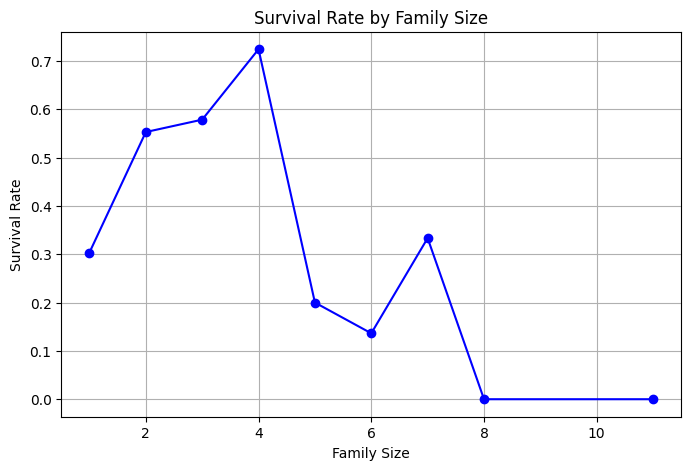

In [61]:
import numpy as np

# Calculate average survival by family size
family_survival = titanic.groupby('family_size')['survived'].mean()

# Plot the survival trend
plt.figure(figsize=(8, 5))
plt.plot(family_survival.index, family_survival.values, marker="o", linestyle="-", color="blue")
plt.xlabel("Family Size")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Family Size")
plt.grid(True)
plt.show()
